# Auto-MPG dataset

## Authors

Written by: Neeraj Asthana (under Professor Robert Brunner)

University of Illinois at Urbana-Champaign

Summer 2016

## Acknowledgements

Dataset found on UCI Machine Learning repository at: http://archive.ics.uci.edu/ml/datasets/Auto+MPG

## Dataset Information

This data set tries to predict the mpg (miles per gallon) of a car (continuous) using many different predcitors.

A description of the dataset can be found at: http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names

Predictors:

- cylinders (multi-valued discrete)
- displacement (continuous)
- horsepower (continuous)
- weight (continuous)
- acceleration (continuous)
- model year (multi-valued discrete)
- origin (multi-valued discrete)
- car name (string - unique)

In [37]:
#Libraries and Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

In [3]:
#Names of all of the columns
names = [
       'mpg'
    ,  'cylinders'
    ,  'displacement'
    ,  'horsepower'
    ,  'weight'
    ,  'acceleration'
    ,  'model_year'
    ,  'origin'
    ,  'car_name'
]

#Import dataset
data = pd.read_csv('auto-mpg.data', sep = '\s+', header = None, names = names)

data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
data.shape

(398, 9)

In [5]:
#Drop nas (labelled as ? in this dataset) -> dropped 6 rows
data_clean=data.applymap(lambda x: np.nan if x == '?' else x).dropna()

data_clean.shape

(392, 9)

In [6]:
#Select Predictor columns
X = data_clean[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', "origin"]]

#Select target column
y = data_clean['mpg']

In [31]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [59]:
#Train a simple linear regression model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

#Print coefficients
list(zip(names[1:8], regr.coef_))

[('cylinders', -0.31018566560924382),
 ('displacement', 0.01426185446892466),
 ('horsepower', -0.011489741294476245),
 ('weight', -0.0062802200287685834),
 ('acceleration', 0.08211330942952208),
 ('model_year', 0.75664441357018108),
 ('origin', 1.622526137700109)]

In [70]:
#Mean Squared error and R-squared on the training set
preds = regr.predict(X_train)
mse = np.mean((preds - y_train) ** 2)
rsq = regr.score(X_train, y_train)

print("Mean Squared Error: %.4f \n R-squared: %.4f" % (mse,rsq))

Mean Squared Error: 10.3198 
 R-squared: 0.8307


In [71]:
#Test model on held out test set
#Mean Squared error on the testing set
preds_ = regr.predict(X_test)
mse_ = np.mean((preds_ - y_test) ** 2)
rsq_ = regr.score(X_test, y_test)

print("Mean Squared Error: %.4f \n R-squared: %.4f" % (mse_,rsq_))

Mean Squared Error: 13.1824 
 R-squared: 0.7779


Populating the interactive namespace from numpy and matplotlib


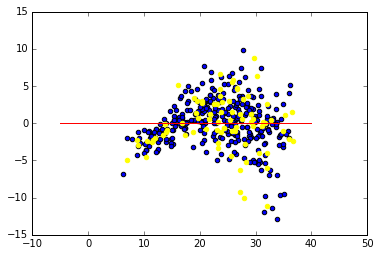

In [54]:
%pylab inline
#Predicted vs. errors plot -> demonstrates an issue with this fit (high bias)
plt.scatter(regr.predict(X_train), regr.predict(X_train)-y_train)
plt.plot([-5,40],[0,0], color = "red")

#place testing data on the plot as well
plt.scatter(regr.predict(X_test), regr.predict(X_test)-y_test, color = "yellow")

In [ ]:
def scatterplot_matrix(data, names, **kwargs):
    """Plots a scatterplot matrix of subplots.  Each row of "data" is plotted
    against other rows, resulting in a nrows by nrows grid of subplots with the
    diagonal subplots labeled with "names".  Additional keyword arguments are
    passed on to matplotlib's "plot" command. Returns the matplotlib figure
    object containg the subplot grid."""
    numvars, numdata = data.shape
    fig, axes = plt.subplots(nrows=numvars, ncols=numvars, figsize=(8,8))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)

    for ax in axes.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

        # Set up ticks only on one side for the "edge" subplots...
        if ax.is_first_col():
            ax.yaxis.set_ticks_position('left')
        if ax.is_last_col():
            ax.yaxis.set_ticks_position('right')
        if ax.is_first_row():
            ax.xaxis.set_ticks_position('top')
        if ax.is_last_row():
            ax.xaxis.set_ticks_position('bottom')

fig = scatterplot_matrix(data, ['mpg'
    ,  'cylinders'
    ,  'displacement'
    ,  'horsepower'
    ,  'weight'
    ,  'acceleration'
    ,  'model_year'
    ,  'origin'],
            linestyle='none', marker='o', color='black', mfc='none')
fig.suptitle('Simple Scatterplot Matrix')
plt.show()

## Data Tasks

1. Read in file
    - Different types of separators (',',' ', '\t', '\s', etc.)
    - Specify whether there is a header or not
    - Name different columns
    
1. Handle missing values (ex. ?, NA, etc.)
    - remove these examples?
    - set these values to an arbitrary value like 0 or NA
    - replace missing values with the mean

1. Select columns for the regression tasks
    - Select columns I want to use as predictors
    - Select which column I am looking to target and predict

1. Transform columns or variables
    - create new features from the features we already have (combinations, squaring, cubing, etc.)
    - PCA?
    - scaling?
    
1. Split data into training and testing sets
    - Set a percentage or value for a training or testing set sizes
    - Also create a validation set?
    - Crossvalidation instead?
    
1. Train model using the training data

1. Perform diagnostics on the model
    - See coefficients
    - See metrics like mean squared error, residual sum of errors, r-squared, etc.

1. Test model on held out testing set
    - See metrics like mean squared error, residual sum of errors, etc.
    
1. Visualizations
    - Visualize dataset as a whole (scatter plot matrix)
    - See diagnostic plots (cooks distances, deviances, predicted vs. actual, etc.)
    - bias or variance issues? 
    
1. Repeat for a new model

